"""

@author matheus dias

## Setembro Amarelo: análise das taxas de suicídio no Brasil com Data Science


<img src="https://www.gov.br/ans/pt-br/assuntos/noticias/qualidade-da-saude/setembro-amarelo-ans-alerta-para-mes-de-prevencao-ao-suicidio/banner-novo-portal-setembro-amarelo.png/@@images/c05f385d-a7b7-4335-a6ae-908f32be1717.png">



**---Português---**

Script para realizar uma análise exploratória dos dados sobre o tema de suicídio no Brasil

Setembro Amarelo é um movimento, uma campanha de conscientização sobre a prevenção do suicídio. Idealizada ainda no final de 2014 por diversas entidades, entre elas o CVV (Centro de Valorização da Vida), teve sua primeira edição em 2015. A cor “amarela” é usada mundialmente como referência direta ao Dia Mundial de Prevenção do Suicídio (10 de setembro).

Ao longo desses anos, tem sido possível observar uma evolução na conscientização da sociedade como um todo em relação ao assunto, com quebra de tabus e a abertura para se conversar abertamente sobre suicídio em diferentes ambientes sociais, como dentro da família, nas empresas, imprensa e poder público.

Qualquer pessoa (física ou jurídica) pode participar do Movimento. Mais do que simplesmente iluminar locais públicos ou chamar a atenção com ações de impacto, o CVV entende que o Setembro Amarelo deve ser uma oportunidade para se tratar do tema suicídio de forma ampla e consciente, por meio de palestras, debates, simpósios, publicações na imprensa e outras formas de criar um ambiente de conhecimento e esclarecimento.

Em 2023, no 9º ano da Campanha, o CVV definiu o tema “Acolher é cuidar” para lembrar a importância de oferecer acolhimento, um olhar compreensivo e não julgador, colocar-se à disposição para conversar amigavelmente com quem pede ajuda ou demonstra precisar de ajuda ao nosso lado.

Seja parte dessa mudança. Promova a conversa sobre a prevenção do suicídio.

---

**---English---**

Script to carry out an exploratory analysis of data on the topic of suicide in Brazil

Yellow September is a movement, an awareness campaign about suicide prevention. Conceived at the end of 2014 by several entities, including the CVV (Center for the Valorization of Life), it had its first edition in 2015. The color “yellow” is used worldwide as a direct reference to World Suicide Prevention Day (10th of September).

Over the years, it has been possible to observe an evolution in the awareness of society as a whole regarding the subject, with the breaking of taboos and the opening to talk openly about suicide in different social environments, such as within the family, in companies, in the press and public power.

Any person (natural or legal) can participate in the Movement. More than simply lighting up public places or drawing attention with impactful actions, the CVV understands that Yellow September should be an opportunity to address the topic of suicide in a broad and conscious way, through lectures, debates, symposiums, publications in press and other ways of creating an environment of knowledge and enlightenment.

In 2023, in the 9th year of the Campaign, the CVV defined the theme “Welcoming is caring” to remember the importance of offering welcome, an understanding and non-judgmental look, making yourself available to talk in a friendly way with those who ask for help or show need for help. help on our side.

Be part of this change. Promote the conversation about suicide prevention.

"""

---

In [45]:
# importação dos pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [46]:
cor_genero = ['#F781D8', '#819FF7']

In [47]:
# Leitura dos dados sobre suicídio para um DataFrame
dataframe_mundial = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")
dataframe_mundial.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [48]:
dataframe_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Dicionário de Variáveis
Esse arquivo csv possui **12 colunas**. São elas:

---------------------------------------------------------------------------

**country:** 
país onde os dados foram registrados (101 países) (string)

**year:** 
ano em que os dados foram registrados (1987 a 2016) (int)

**sex:** 
sexo considerado no registro (male - masculino, female - feminino) (string)

**age:** 
faixa etária considerada (5-14 anos, 15-24 anos, 25-34 anos, 35-54 anos, 55-74 anos, 75+ anos) (int)

**suicides_no:** número de suicídios (int)

**population:** população para o grupo (int)

**suicides/100k pop:** número de suicídios por 100 mil habitantes (float)

**country_year:** identificador contendo country + year (string)

**HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano (float)

**gdp_for_year:** Produto Interno Bruto (PIB) para o ano (int)

**gdp_per_capita:** Produto Interno Bruto (PIB) per capita (int)

In [49]:
# extrair apenas os dados relativos ao Brasil
dataframe_brasil = dataframe_mundial[dataframe_mundial['country']=='Brazil'].copy()
print('Linhas/Colunas:', dataframe_brasil.shape)
dataframe_brasil.head()

Linhas/Colunas: (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [50]:
# excluir dados nulos do conjunto
print('---> Mundial <---')
display(dataframe_mundial.isnull().sum())
print('---> Brasil <---')
display(dataframe_brasil.isnull().sum())

---> Mundial <---


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

---> Brasil <---


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## Taxa média de suicídios no mundo X no Brasil
----------------------------------------------------------
 Análise comparativa da média de suicídios no Brasil x no mundo. É importante verificar a tendência ao longo do tempo, para termos um diagnóstico geral sobre a tendência do gráfico em relação taxa mundial.

 Deve-se usar essa relação por 100 mil, pois a população do país cresceu muito de 1985 para 2015. Se formos comparar em termos absolutos, poderemos tirar conclusões erradas ou distorcidas.

''

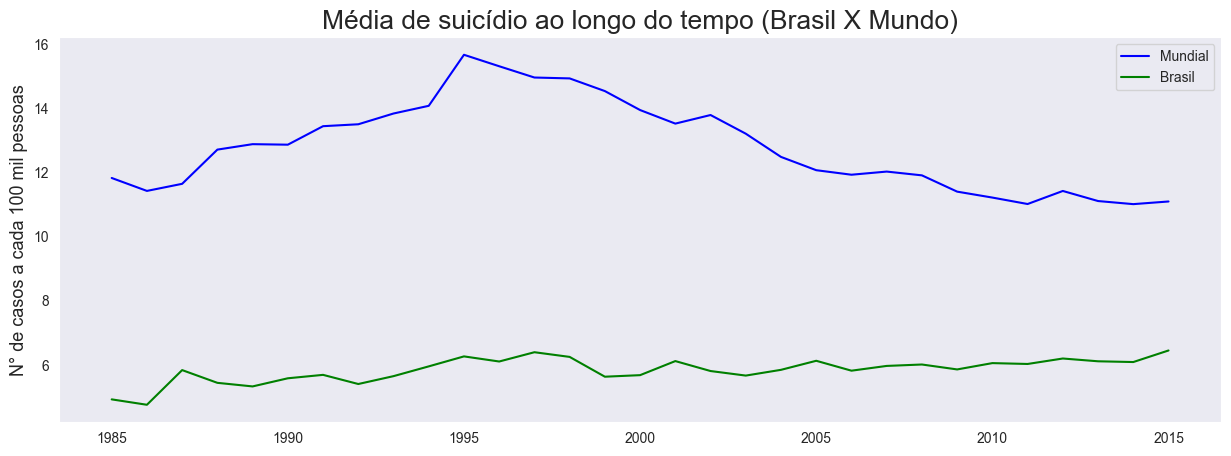

In [51]:
# pegar a média mundial e do Brasil em suicídios
anos = dataframe_brasil.year.unique()

suicidio_brasil_media = dataframe_brasil.groupby('year')['suicides/100k pop'].mean()
suicidio_mundial_media = dataframe_mundial.groupby('year')['suicides/100k pop'].mean()

gdp_media_mundo = dataframe_mundial.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil = dataframe_brasil.groupby('year')['gdp_per_capita ($)'].mean()

suicidio_mundial_media.drop(2016, inplace=True)

# plotar dados
fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=suicidio_mundial_media, label='Mundial', color='blue')
ax = sns.lineplot(x=anos, y = suicidio_brasil_media, label='Brasil', color='green')
plt.title('Média de suicídio ao longo do tempo (Brasil X Mundo)', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)
;

A taxa média de suicídio no Brasil está **aumentando** lentamente. Esta taxa de suicídio aumentou de **59,18** por 100 milhões de habitantes em 1985 para **77,45** por 100 milhões de habitantes em 2015, crescendo cerca de **30,87%**, ou quase **1%** ao ano.

Por outro ângulo, a taxa global de suicídio tem **diminuído** ao longo do tempo. O número de suicídios por 100.000 residentes aumentou quase **115%** entre 1985 e 1995, no entanto esta tendência mudou rapidamente, caindo cerca de **85,35%** entre 1995 e 2015, ou cerca de **4,26%** ao ano. Ao longo dos 30 anos analisados, a taxa de redução foi de **68,47%**, ou cerca de **2%** a cada ano.

In [52]:
# demonstração
mundial_grouped = dataframe_mundial.groupby('year')['suicides/100k pop'].sum().reset_index()
brasil_grouped = dataframe_brasil.groupby('year')['suicides/100k pop'].sum().reset_index()
mundial_grouped.rename(columns={'suicides/100k pop': 'suicides/100k pop (Mundial)'}, inplace=True)
brasil_grouped.rename(columns={'suicides/100k pop': 'suicides/100k pop (Brasil)'}, inplace=True)
merged_data = pd.merge(mundial_grouped, brasil_grouped, on='year')
print(merged_data)


    year  suicides/100k pop (Mundial)  suicides/100k pop (Brasil)
0   1985                      6811.89                       59.18
1   1986                      6579.84                       57.16
2   1987                      7545.45                       70.12
3   1988                      7473.13                       65.36
4   1989                      8036.54                       64.02
5   1990                      9878.75                       67.06
6   1991                     10321.06                       68.34
7   1992                     10528.88                       64.92
8   1993                     10790.29                       67.86
9   1994                     11483.79                       71.51
10  1995                     14660.26                       75.24
11  1996                     14142.21                       73.33
12  1997                     13817.83                       76.80
13  1998                     14150.72                       75.05
14  1999  

## Faixa etária com maior taxa média de suícidio
-------------------------------

Podemos categorizar as pessoas que estamos estudando por faixa etária para entender melhor quem são. O primeiro parágrafo nos fornecerá uma visão geral fundamental das pessoas que cometem suicídio. O objetivo aqui é determinar qual faixa etária tem a maior representação entre aqueles que tiram a própria vida e determinar se houve alguma mudança em seus perfis ao longo do estudo.

In [53]:
# criar uma tabela dinâmica
tabela = pd.pivot_table(dataframe_brasil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,NaN
1986,31.0,508.0,505.5,651.0,372.0,NaN
1987,33.5,502.0,565.5,724.5,422.0,NaN
1988,30.0,472.0,557.5,724.0,356.0,NaN
1989,31.5,491.5,569.0,692.5,354.5,NaN


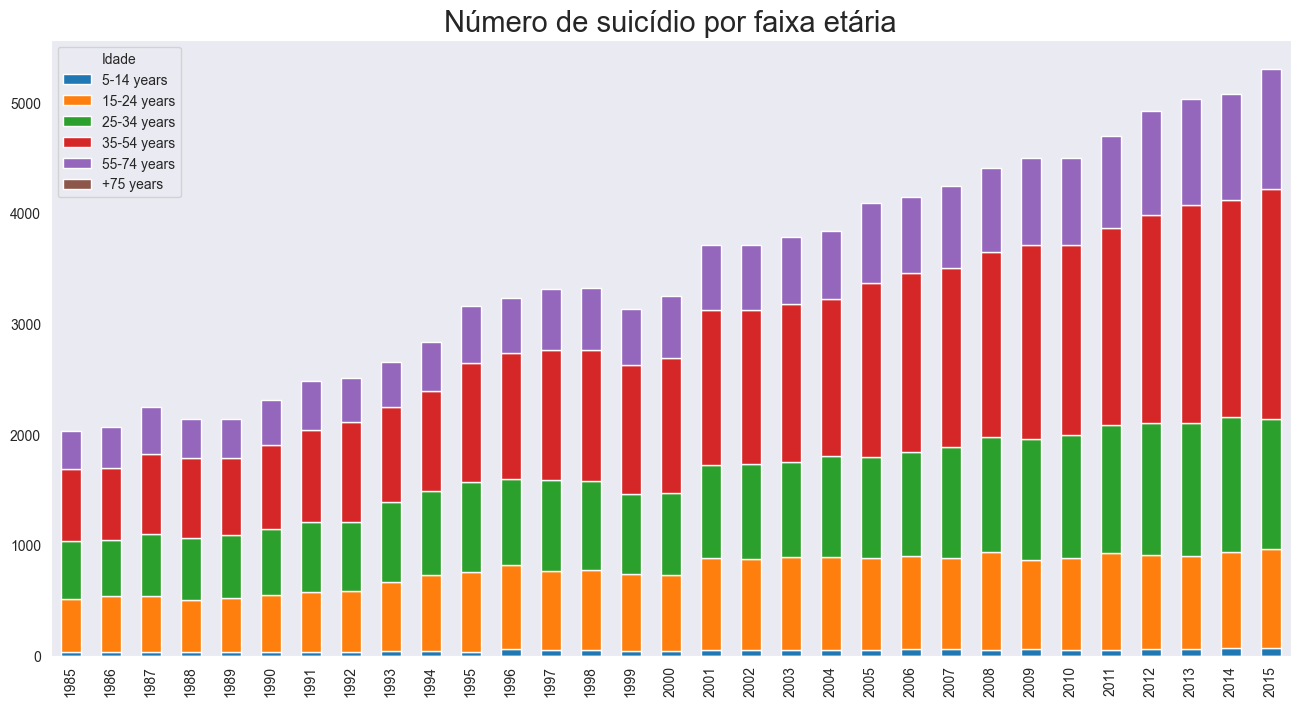

In [54]:
# plotar os dados da pivot table
tabela2 = pd.pivot_table(dataframe_brasil, values ='suicides/100k pop',index=['sex'],columns=['year'])
tabela2 = tabela2.T
26267 / tabela.sum().sum()

tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title('Número de suicídio por faixa etária',fontsize=21);

Mesmo visualmente é fácil identificar que a faixa etária com maior número de suicídios foi a de 35 a 54 anos, com 39930 **(36,70%)**, seguido de 25 a 34 anos de idade 26267 de 25 a 34 anos **(24,14%)**.

Juntos, esses dois grupos correspondem a quase **60%** dos registros do banco de dados.

## Geração
------------------
**Generation X:** Geração X é uma expressão que se refere à geração nascida após o baby boom pós-Segunda Guerra Mundial. Inclui as pessoas nascidas a partir dos anos 1960 até o final dos anos 1970. [2]

**Silent:** Geração Silenciosa é um termo usado para se referir à população nascida entre 1925 e 1942, nomeadamente durante a Grande Depressão e Segunda Guerra Mundial. [3]

**Millenials:** A geração Y, também chamada geração do milênio, geração da internet, são os nascidos após o início da década de 1980 até, aproximadamente, o final do século. Alguns autores consideram até 2005. [4]

**Boomers:** Baby boomers dá nome à geração de pessoas nascidas entre os anos de 1946 e 1964. [5]

**G.I. Generation:** Geração grandiosa (em inglês, Greatest generation) se refere à geração formada pelos indivíduos que cresceram durante a Grande Depressão (1929–39) nos Estados Unidos e depois participaram dos combates da Segunda Guerra Mundial (1939–45, com participação dos EUA entre 1941 e 1945). [6]

**Generation Z:** A Geração Z é a definição sociológica para a geração de pessoas nascidas, em média, entre a segunda metade dos anos 1990 até o início do ano 2010. A teoria mais aceita por estudiosos é que surgiu como sucessória à Geração Y. [7]

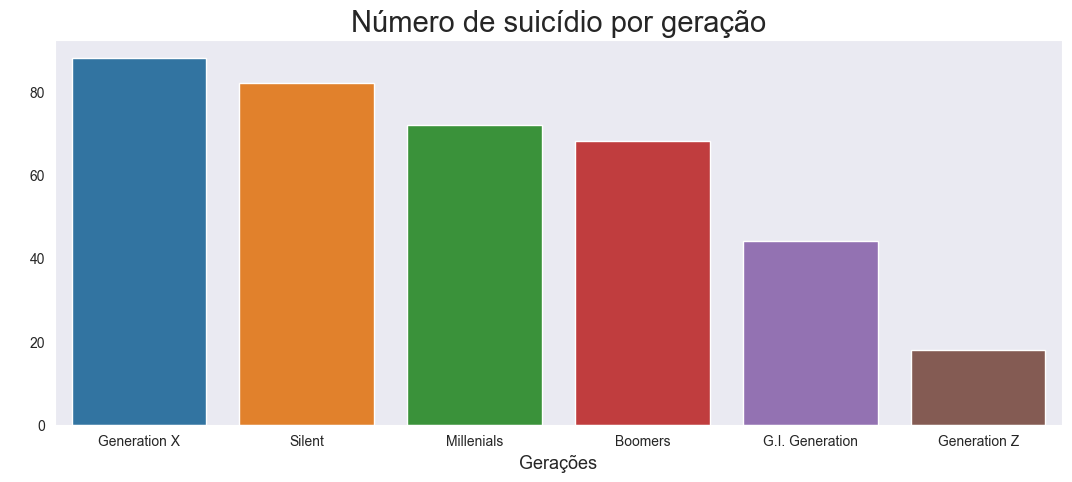

In [55]:
# plotar dados por geração
fig = plt.figure(figsize=(13, 5))
sns.countplot(x='generation', order=dataframe_brasil['generation'].value_counts().index, data=dataframe_brasil)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Número de suicídio por geração',fontsize=21)
plt.show()

A geração com mais suicídios relatados foi a **geração X (23,65%)**, seguida pela **geração Silenciosa (22,04%)**.

Compreender a faixa etária permite-nos concentrar a nossa mensagem naqueles que são mais afetados, o que a torna mais eficaz.

## Gênero
----------------------
Outra característica intrigante é o gênero. Compreender as diferenças de género nas tendências suicidas pode ajudar-nos a reorientar a mensagem, além de compreender algumas normas sociais.

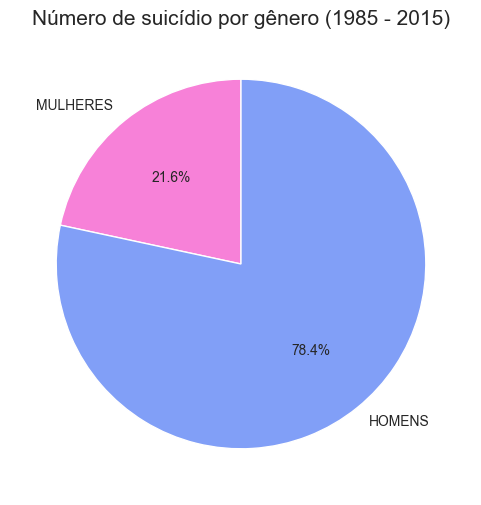

In [56]:
# plotar dados por gênero
generos = dataframe_brasil.groupby('sex').suicides_no.sum() / dataframe_brasil.groupby('sex').suicides_no.sum().sum()

fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors = cor_genero, autopct='%1.1f%%', shadow = False, startangle=90)
plt.title('Número de suicídio por gênero (1985 - 2015)', fontsize=15);

In [57]:
#Quantas vezes a mais o homem se suicida em relação às mulheres?
dataframe_brasil.groupby('sex').suicides_no.sum()[1] / dataframe_brasil.groupby('sex').suicides_no.sum()[0]

3.62333979394063

Os homens cometem suicídio **3,62** vezes mais que as mulheres e, como pode ser visto no gráfico abaixo, esse padrão se repete ao longo do tempo.

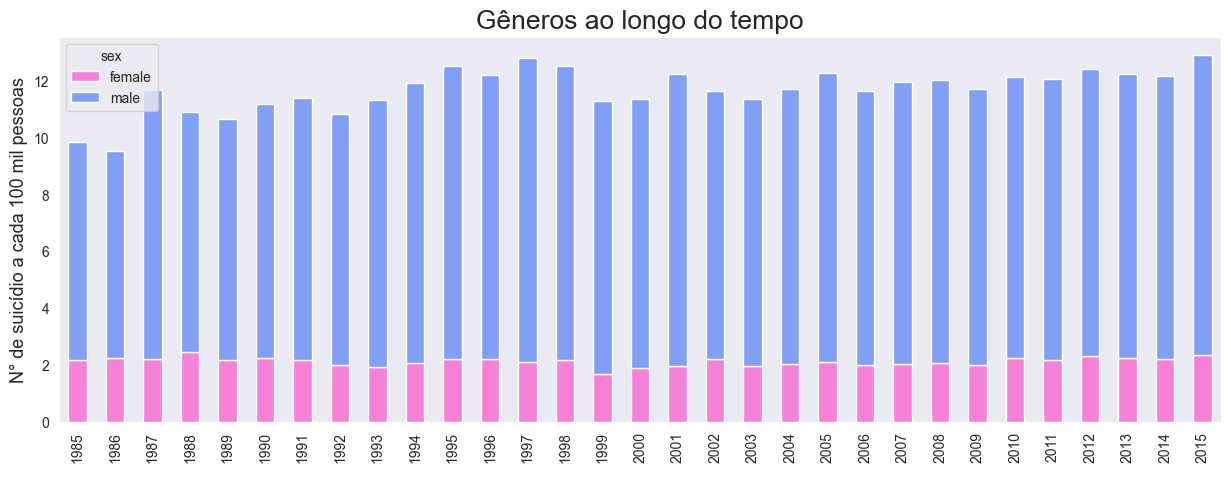

In [58]:
# plotar dados de gênero ao longo do tempo
tabela2.plot.bar(stacked=True, figsize=(15,5), color=cor_genero)
plt.xlabel(' ')
plt.title('Gêneros ao longo do tempo', fontsize=19)
plt.ylabel('N° de suicídio a cada 100 mil pessoas', fontsize=13);

## Número total de suicídios por faixa etária
------------------

In [59]:
# criação das variáveis
mulheres = dataframe_mundial.groupby(['sex', 'age'])['suicides_no'].sum()[:6] 
homens = dataframe_mundial.groupby(['sex', 'age'])['suicides_no'].sum()[6:] 
feminino = [] 
masculino = [] 
numero_feminino = [] 
numero_masculino = [] 
for i in range(6):
  feminino.append(mulheres.index[i][1].split(' ')[0])
  masculino.append(homens.index[i][1].split(' ')[0])
  numero_feminino.append(mulheres[i])
  numero_masculino.append(homens[i])

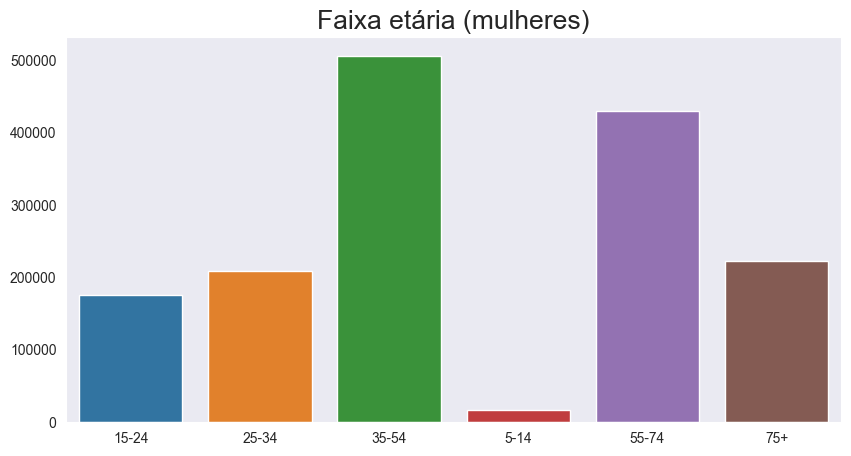

In [60]:
# plotar dados das novas variáveis
fig = plt.figure(figsize=(10,5))
sns.barplot(x=feminino, y = numero_feminino, data=dataframe_brasil)
plt.title('Faixa etária (mulheres)', fontsize=19);

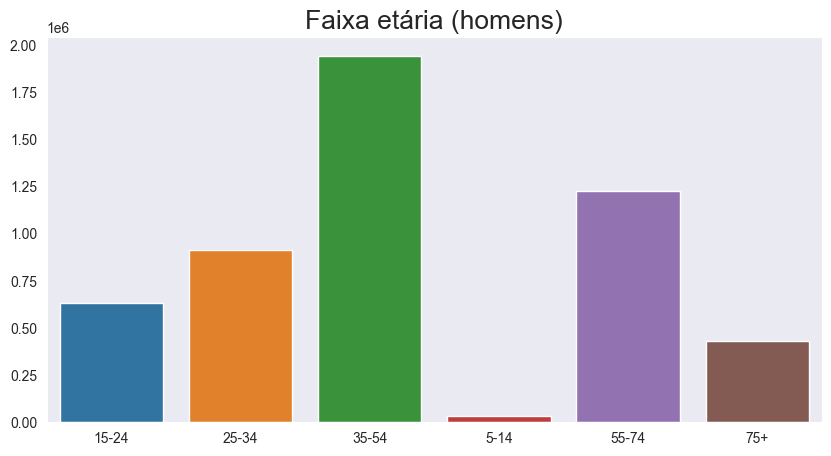

In [61]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=masculino, y = numero_masculino, data=dataframe_brasil)
plt.title('Faixa etária (homens)', fontsize=19);

In [62]:
print(f'''
Total de homens: {sum(numero_masculino)}
Total de mulheres: {sum(numero_feminino)}
''')


Total de homens: 5188910
Total de mulheres: 1559510



## Fatores econômicos 
------
Finalmente, as análises econômicas são fatores significativos porque nos permitem ver se certas variáveis ​​têm ou não impacto no suicídio.

As variáveis econômicas são: **PIB, PIB per capita e IDH**

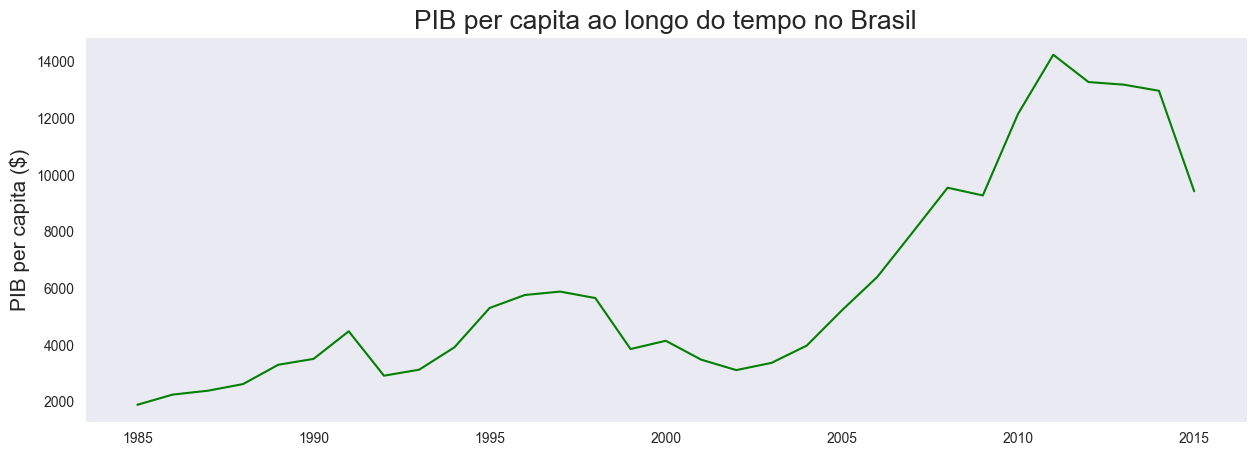

In [63]:
# plotar dados de PIB per capita
fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=gdp_media_brasil, color = 'green')
plt.ylabel('PIB per capita ($)', fontsize=15)
plt.title('PIB per capita ao longo do tempo no Brasil',fontsize=19);

''

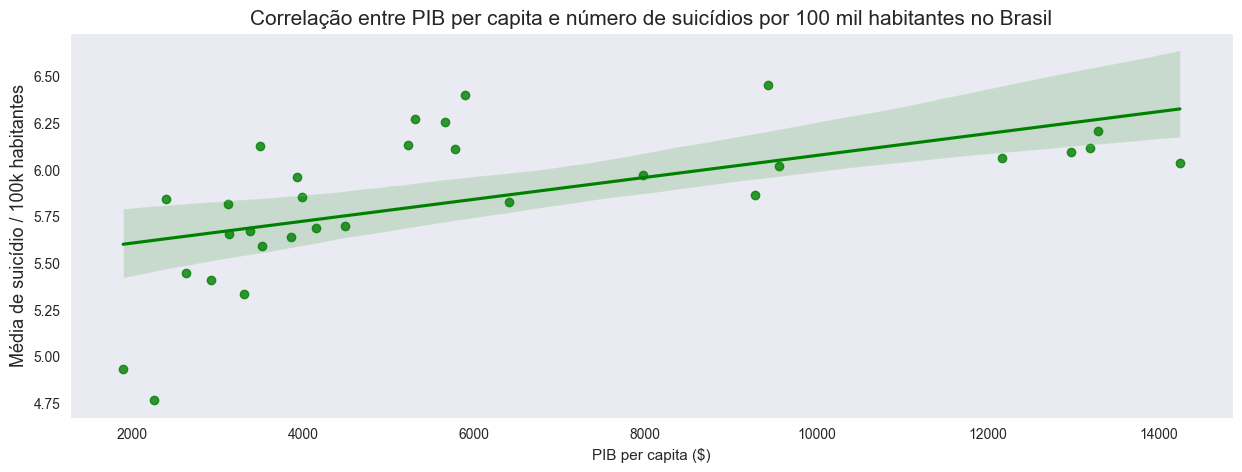

In [64]:
# correlação entre pib per capita e número de suicídios
fig = plt.figure(figsize=(15,5))
sns.regplot(x=gdp_media_brasil, y =suicidio_brasil_media, data=dataframe_brasil, color='green')
plt.title('Correlação entre PIB per capita e número de suicídios por 100 mil habitantes no Brasil',fontsize=15)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
plt.xlabel('PIB per capita ($)',fontsize=11)
;

''

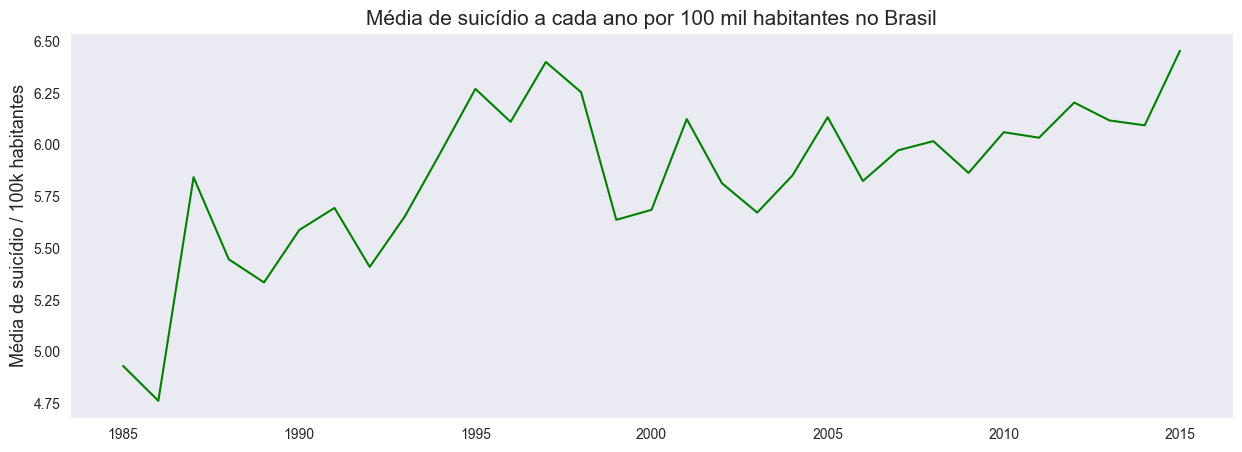

In [65]:
# plotar dados da média de suicídios no brasil a cada ano
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=anos, y =suicidio_brasil_media, color = 'green')
plt.title('Média de suicídio a cada ano por 100 mil habitantes no Brasil', fontsize=15)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
;

Observando o gráfico, entende-se que apesar do **aumento da renda per capita do país**, o **número de suicídios** por 100.000 habitantes **não diminuiu**. Isto mostra que o problema do suicídio não mudou à medida que o país se expandiu, e uma análise económica e estatística pode não ser suficiente para explicar isto.

''

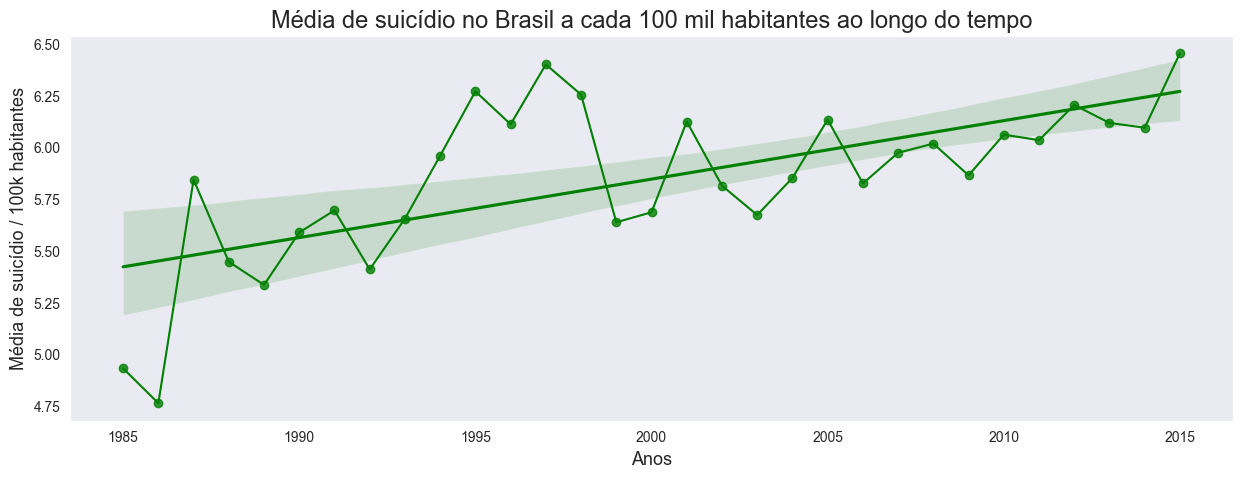

In [66]:
# plotar dados mas levando em consideração o tempo
fig = plt.figure(figsize=(15,5))
sns.regplot(x=anos, y =suicidio_brasil_media, data=dataframe_brasil, color='green')
plt.title('Média de suicídio no Brasil a cada 100 mil habitantes ao longo do tempo',fontsize=17)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
plt.xlabel('Anos',fontsize=13)
sns.lineplot(x=anos, y =suicidio_brasil_media, color = 'green')
;

O gráfico de linhas acima demonstra que o **número médio de suicídios tem vindo a crescer** ao longo do tempo, oscilando entre apenas alguns anos a menos e mais alguns anos, mas a um ritmo constante, indicando que a situação tem **aumentado gradualmente** ao longo dos **últimos 30 anos**.

## Conclusão
---
Compreender temas como o suicídio nos ajuda a entender como as pessoas interagem com suas próprias vidas e a perceber que não é um problema fácil. Determinar o que leva alguém a cometer suicídio é muito diferente de examinar as tendências globais e nacionais. Os dados por si só não nos dizem nada, nem as perspectivas sobre os dados por si só nos contam histórias. Nos bastidores, há uma área da ciência focada na investigação do suicídio usando uma abordagem distinta da ciência de dados, estatística e economia.

## Resumo dos dados obtidos
---
**Taxas de suicídio:**

**>>** A taxa de suicídio no Brasil se manteve crescente ao longo do período estudado (1,03% ao ano)

**>>** A taxa de suicídio no Mundo vem reduzindo desde 1995 (4,26% ao ano)


**Maiores vítimas:**

**>>** Homens (78,4%)

**>>** Faixa etária 35-54 anos de idade (36,70%)

**>>** Geração X (23,65%)